1. **Load the MNIST dataset:**

* Use keras.datasets.mnist.load_data() to load the training and testing data.
* Print the shapes of the loaded data to understand the dataset structure.

In [1]:
import tensorflow as tf
from tensorflow import keras

(x_train_data, y_train_data), (x_test_data, y_test_data) = keras.datasets.mnist.load_data()

print("x_train_data shape:", x_train_data.shape)
print("y_train_data shape:", y_train_data.shape)
print("x_test_data shape:", x_test_data.shape)
print("y_test_data shape:", y_test_data.shape)

x_train_data shape: (60000, 28, 28)
y_train_data shape: (60000,)
x_test_data shape: (10000, 28, 28)
y_test_data shape: (10000,)


2. **Preprocess the data for a Fully Connected Neural Network:**

* Flatten the images from 28x28 to 784 pixels.
* Normalize the pixel values by dividing by 255.
* One-hot encode the target labels using keras.utils.np_utils.to_categorical().


In [2]:
# Flatten and Normalize
x_train = x_train_data.reshape(-1, 784) / 255.0
x_test = x_test_data.reshape(-1, 784) / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train_data, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_data, num_classes=10)


3. **Build and train a Fully Connected Neural Network:**

* Create a Sequential model.
* Add Dense layers with appropriate activation functions (e.g., ReLU and softmax).
* Compile the model with an optimizer (e.g., Adam), loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy).
* Train the model using model.fit() and evaluate its performance.

In [3]:
# Build the model
model1 = keras.Sequential()

model1.add(keras.layers.Dense(128, activation='relu', input_shape=(784,)))  # Hidden layer 1: 128 neurons, ReLU activation
model1.add(keras.layers.Dense(64, activation='relu')) # Hidden layer 2: 64 neurons, ReLU activation
model1.add(keras.layers.Dense(10, activation='softmax'))  # Output layer: 10 neurons (one per digit), Softmax activation for classification

# Compile the model
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history_mlp = model1.fit(x_train, y_train,
           epochs=10,
           batch_size=32,
           validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model1.evaluate(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8726 - loss: 0.4363 - val_accuracy: 0.9606 - val_loss: 0.1315
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9681 - loss: 0.1067 - val_accuracy: 0.9681 - val_loss: 0.1015
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9780 - loss: 0.0679 - val_accuracy: 0.9756 - val_loss: 0.0775
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9828 - loss: 0.0514 - val_accuracy: 0.9760 - val_loss: 0.0794
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9872 - loss: 0.0397 - val_accuracy: 0.9759 - val_loss: 0.0847
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9896 - loss: 0.0313 - val_accuracy: 0.9764 - val_loss: 0.0789
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9928 - loss: 0.0241 - val_accuracy: 0.9789 - val_loss: 0.0738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9929 - loss: 0.02

4. **Preprocess the data for a Convolutional Neural Network:**

* Reshape the input data to the shape expected by a Conv2D layer (e.g., (60000, 28, 28, 1)).
* Normalize the pixel values by dividing by 255.
* One-hot encode the target labels using keras.utils.np_utils.to_categorical().


In [4]:
# Reshape and Normalize
x_train_cnn = x_train_data.reshape(-1, 28, 28, 1)/255.0
x_test_cnn = x_test_data.reshape(-1, 28, 28, 1)/255.0

# One-hot encoding
y_train_cnn = tf.keras.utils.to_categorical(y_train_data, num_classes=10)
y_test_cnn = tf.keras.utils.to_categorical(y_test_data, num_classes=10)

5. **Build and train a Convolutional Neural Network:**

* Create a Sequential model.
* Add Conv2D and MaxPool2D layers.
* Add a Flatten layer.
* Add Dense layers with appropriate activation functions.
* Compile and train the model, similar to the Fully Connected Neural Network.

In [5]:
# Build the model
model2 = keras.Sequential()

# Convolutional and Maxpooling layers
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer 1
model2.add(keras.layers.MaxPooling2D((2, 2)))  # Max pooling layer

model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer 2
model2.add(keras.layers.MaxPooling2D((2, 2)))  # Max pooling layer

# Flatten layer
model2.add(keras.layers.Flatten())  # Flatten layer

# Dense layers
model2.add(keras.layers.Dense(128, activation='relu'))  # Hidden layer 1
model2.add(keras.layers.Dense(64, activation='relu'))  # Hidden layer 2
model2.add(keras.layers.Dense(10, activation='softmax'))  # Output layer

# Compile the model
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history_cnn = model2.fit(x_train_cnn, y_train_cnn,
           epochs=10,
           batch_size=32,
           validation_data=(x_test_cnn, y_test_cnn))

# Evaluate the model
loss, accuracy = model2.evaluate(x_test_cnn, y_test_cnn)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8888 - loss: 0.3414 - val_accuracy: 0.9810 - val_loss: 0.0584
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9849 - loss: 0.0476 - val_accuracy: 0.9860 - val_loss: 0.0443
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9903 - loss: 0.0297 - val_accuracy: 0.9861 - val_loss: 0.0430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9908 - val_loss: 0.0358
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accuracy: 0.9894 - val_loss: 0.0430
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9973 -

6. **Compare the performance:**

* Analyze the accuracy of both models.
* Observe the difference between the Fully connected model and the CNN model.

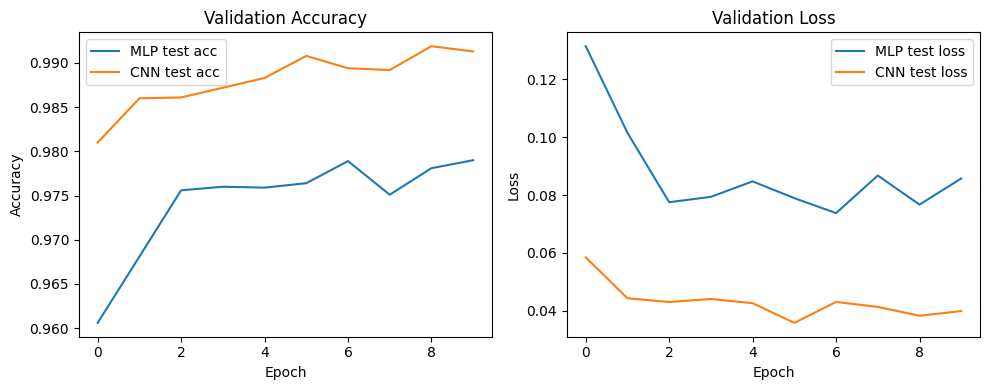

In [7]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['val_accuracy'], label='MLP test acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN test acc')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['val_loss'], label='MLP test loss')
plt.plot(history_cnn.history['val_loss'], label='CNN test loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Both models achieve high accuracy on the MNIST test set, but several differences stand out:

The CNN consistently outperforms the MLP in validation accuracy, reaching over 99% accuracy within just a few epochs.

The CNN shows a significantly lower and more stable validation loss throughout training.

The CNN generalizes better thanks to its ability to extract local spatial features (edges, patterns, etc.) from images. In contrast, the MLP learns from flattened input, losing spatial relationships and being more prone to overfitting.

**Conclusion**

The CNN is better suited for image classification tasks like MNIST, as it takes advantage of the 2D structure of image data.
However, the MLP still performs surprisingly well on this relatively simple dataset, making it a solid baseline model.